In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
books=pd.read_csv("/content/book.csv",encoding='latin1')

In [5]:
books

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [6]:
books.rename({"User.ID":"ID","Book.Title":"Title","Book.Rating":"Rating"},axis=1,inplace=True)

In [7]:
books

,Unnamed: 0,ID,Title,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [8]:
books.drop({"Unnamed: 0"},axis=1)

,ID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [9]:
books.describe()

,Unnamed: 0,ID,Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [10]:
books.shape

(10000, 4)

In [11]:
books.skew()

<ipython-input-11-81285d340fc9>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  books.skew()


Unnamed: 0    0.000000
ID            0.633446
Rating       -0.646652
dtype: float64

In [12]:
books.kurt()

<ipython-input-12-6495afa7c95c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  books.kurt()


Unnamed: 0   -1.200000
ID           -1.363830
Rating        0.260688
dtype: float64

In [13]:
books.isna().any()

Unnamed: 0    False
ID            False
Title         False
Rating        False
dtype: bool

In [14]:
books['Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

In [15]:
books.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Rating, dtype: float64

In [16]:
books.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Rating, dtype: int64

In [17]:
rating=pd.DataFrame(books.groupby('Title')['Rating'].mean())

In [18]:
rating

,Rating
Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [19]:
rating['num_of_ratings']=pd.DataFrame(books.groupby('Title')['Rating'].count())

In [20]:
rating.head()

,Rating,num_of_ratings
Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


<Axes: >

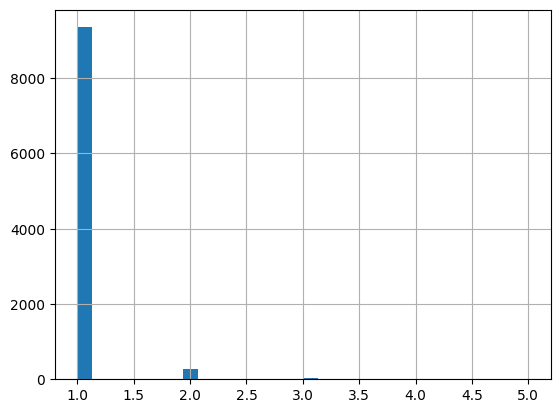

In [21]:
rating['num_of_ratings'].hist(bins=30)

<ipython-input-22-10bca736fca4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating["Rating"])


<Axes: xlabel='Rating', ylabel='Density'>

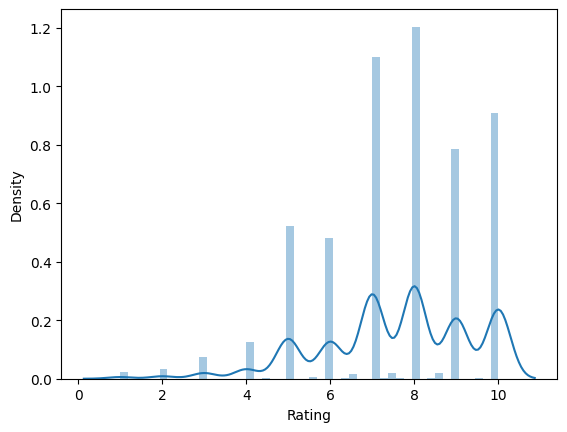

In [22]:
sns.distplot(rating["Rating"])

In [23]:
books1=books.pivot_table(index='ID',columns='Title',values='Rating')

In [24]:
books1

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [25]:
books1.fillna(0,inplace=True)

In [26]:
books1

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [27]:
len(books1)

2182

In [28]:
rating.sort_values('num_of_ratings',ascending=False)

,Rating,num_of_ratings
Title,,
Fahrenheit 451,7.00,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
Stardust,8.50,4
Vanished,6.50,4
Charlie and the Chocolate Factory,6.50,4
...,...,...
His and Hers: Ranchin' Dads (Harlequin - Western Lovers),9.00,1
"His-And-Hers Twins (Harlequin American Romance, No. 820)",10.00,1
Histoires Extraordinaires,7.00,1


In [29]:
fahrenheit=books1['Fahrenheit 451']

In [30]:
fahrenheit.head()

ID
8     0.0
9     0.0
10    0.0
12    0.0
14    0.0
Name: Fahrenheit 451, dtype: float64

In [31]:
stardust=books1['Stardust']

In [32]:
stardust.head()

ID
8     0.0
9     0.0
10    0.0
12    0.0
14    0.0
Name: Stardust, dtype: float64

In [33]:
similar_to_fahrrenheit=books1.corrwith(fahrenheit)
similar_to_stardust=books1.corrwith(stardust)

In [34]:
similar_to_fahrrenheit

Title
 Jason, Madison &amp                                                      -0.000958
 Other Stories;Merril;1985;McClelland &amp                                -0.000958
 Repairing PC Drives &amp                                                 -0.000958
'48                                                                       -0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities     -0.000958
                                                                             ...   
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character   -0.000958
\Well, there's your problem\: Cartoons                                    -0.000958
iI Paradiso Degli Orchi                                                   -0.000958
stardust                                                                  -0.000958
Ã?Â?bermorgen.                                                            -0.000958
Length: 9659, dtype: float64

In [35]:
corr_fahrenheit=pd.DataFrame(similar_to_fahrrenheit,columns=['Correlation'])

In [36]:
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit.head()

,Correlation
Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [37]:
corr_fahrenheit.sort_values('Correlation',ascending=False)

,Correlation
Title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
A la vora del pou (El BalancÃ­),0.596326
"Father Of Two (The Daddy School) (Harlequin Superromance, No 771)",0.596326
Contes de fÃ?Â©es Ã?Â l'usage des moyennes personnes,0.596326
...,...
Strangers,-0.001657
"The Amber Spyglass (His Dark Materials, Book 3)",-0.001836
Charlie and the Chocolate Factory,-0.001890


In [38]:
corr_fahrenheit=corr_fahrenheit.join(rating['num_of_ratings'])

In [39]:
corr_fahrenheit=corr_fahrenheit.join(rating['Rating'])

In [40]:
corr_fahrenheit

,Correlation,num_of_ratings,Rating
Title,,,
"Jason, Madison &amp",-0.000958,1,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000958,1,6.0
Repairing PC Drives &amp,-0.000958,1,4.0
'48,-0.000958,1,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958,1,8.0
...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000958,1,8.0
"\Well, there's your problem\: Cartoons",-0.000958,1,9.0
iI Paradiso Degli Orchi,-0.000958,1,7.0


In [41]:
corr_stardust=pd.DataFrame(similar_to_stardust,columns=['Correlation'])

In [42]:

corr_stardust

,Correlation
Title,
"Jason, Madison &amp",-0.000913
Other Stories;Merril;1985;McClelland &amp,-0.000913
Repairing PC Drives &amp,-0.000913
'48,-0.000913
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000913
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000913
"\Well, there's your problem\: Cartoons",-0.000913
iI Paradiso Degli Orchi,-0.000913


In [43]:
corr_stardust.dropna(inplace=True)

In [44]:
corr_stardust.sort_values('Correlation',ascending=False)

,Correlation
Title,
Stardust,1.000000
Fantastic Beasts and Where to Find Them,0.467784
Beyond the Golden Hills and Other Stories,0.467784
Running with Scissors,0.467784
"This Gray Spirit (Star Trek Deep Space Nine: Mission Gamma, Book 2)",0.467784
...,...
Ender's Game (Ender Wiggins Saga (Paperback)),-0.001789
Vanished,-0.001801
Charlie and the Chocolate Factory,-0.001801


In [45]:
corr_stardust=corr_stardust.join(rating['num_of_ratings'])
corr_stardust=corr_stardust.join(rating['Rating'])

In [46]:
corr_stardust

,Correlation,num_of_ratings,Rating
Title,,,
"Jason, Madison &amp",-0.000913,1,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000913,1,6.0
Repairing PC Drives &amp,-0.000913,1,4.0
'48,-0.000913,1,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000913,1,8.0
...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000913,1,8.0
"\Well, there's your problem\: Cartoons",-0.000913,1,9.0
iI Paradiso Degli Orchi,-0.000913,1,7.0


In [47]:
corr_fahrenheit[corr_fahrenheit['Rating']>5].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings,Rating
Title,,,
Fahrenheit 451,1.000000,5,7.0
The Day I Swapped My Dad for 2 Goldfish,0.596326,1,9.0
Silent Witness,0.596326,1,7.0
The Onion Girl,0.596326,1,7.0
Mr. Punch,0.596326,1,7.0


In [48]:
corr_stardust[corr_stardust['Rating']>5].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings,Rating
Title,,,
Stardust,1.000000,4,8.5
Fantastic Beasts and Where to Find Them,0.467784,1,7.0
Ring of Fire,0.467784,1,7.0
Scooter and the Galactic Starship,0.467784,1,7.0
"Galahad In Blue Jeans (Way Out West) (Silhouette Intimate Moments, 971)",0.467784,1,7.0
